<a href="https://colab.research.google.com/github/hoangnuthuphuong/Machine_Learning/blob/main/Chuong3_HoiQuyTuyenTinhDaBien/BaiTapTaiLop3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xây dựng mô hình hồi quy tuyến tính đa biến, xét 3 trường hợp**
- Dữ liệu không được chuẩn hóa
- Dữ liệu được chuẩn hóa theo công thức mean normalization
- Dữ liệu được chuẩn hóa theo công thức min - max normalization

**So sánh kết quả của w_optimal trong các trường hợp nêu trên. Sử dụng tập dữ liệu trong đề**

In [ ]:
# Các thư viện cần dùng
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Kết nối với drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Hàm đọc dữ liệu từ tập tin 
def readData(folder, filename):

    # Trích xuất tệp dữ liệu gốc
    data = np.loadtxt(os.path.join(folder, filename), delimiter=',')
    print('Original data shape', data.shape)

    # Trích X và y ra từ tập dữ liệu gốc 
    X = data[:,:-1]
    print('X shape: ', X.shape)
    y = data[:,-1]
    print('y shape: ', y.shape)
    m = X.shape[0]

    # Số lần training 
    print('Number of training examples m = ', m)
    x0 = np.ones((m,1))

    # Ghép column 
    X = np.hstack([x0, X]) 
    print('Modified X shape: ', X.shape)
    y = np.reshape(y, (m,1))
    print('Modified y shape: ', y.shape)
    return X, y

# link tìm hiểu thêm về các cách nối mảng: https://laptrinhtudau.com/noi-hai-mang-array-join-trong-numpy/

# **Trường hợp 1: DỮ LIỆU KHÔNG ĐƯỢC CHUẨN HÓA**

In [ ]:
# Hàm mất mát 
def computeLoss(X, y, w):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

In [ ]:
# Hàm Gradient Descent
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    print('w_optimal shape: ', w_optimal.shape)
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y

        # Tính giá trị vector trọng số tối ưu
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)

        # List chưa tất cả giá trị của hàm mất mát tương ứng với các giá trị vector trọng số tại mỗi bước lặp
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
# Mô tả dữ liệu bằng plot 
def visualizeDataAndModel(X, y, w_optimal):
    fig = plt.figure()
    plt.plot(X[:,1], y, 'g^')
    plt.plot(X[:, 1], np.dot(X, w_optimal), 'r-')
    plt.legend(['Raw Data', 'Linear regression'])
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    plt.show()


Original data shape (47, 3)
X shape:  (47, 2)
y shape:  (47,)
Number of training examples m =  47
Modified X shape:  (47, 3)
Modified y shape:  (47, 1)
w_optimal shape:  (3, 1)
Optimal weights are:  [[nan]
 [nan]
 [nan]]
Loss function:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


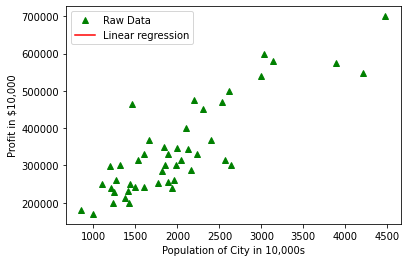

In [ ]:
def main():
    n = 1500
    alpha = 0.01
    X, y = readData("/content/gdrive/MyDrive/Classroom/Học máy 1 Phần cơ sở", "ex1data2.txt")
    w = np.zeros((X.shape[1], 1))
    w, J_history = gradientDescent(X, y, w, alpha, n)
    print("Optimal weights are: ", w)
    print("Loss function: ", J_history[-1])
    visualizeDataAndModel(X, y, w)

if __name__ == '__main__':
    main()

# **Trường hợp 2: DỮ LIỆU ĐƯỢC CHUẨN HÓA THEO CÔNG THỨC MEAN NORMALIZATION**

In [ ]:
# Hàm thiết lập tính năng scale của vector
def featureVectorScaling(data):
    avg = np.mean(data)
    sln = data.max()
    snn = data.min()
    data_scl = (data - avg)/(sln - snn)
    print(data_scl[1])
    return data_scl

In [ ]:
# Hàm scale dữ liệu
def scaleData(X, y):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    y_scl = featureVectorScaling(y)
    print('X_scl shape: ', X_scl.shape)
    print(X_scl[1,:])
    print('y scl shape: ', y_scl.shape)
    print(y_scl[1,:])
    return X_scl, y_scl

In [ ]:
# Hàm mất mát 
def computeLoss(X, y, w):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

In [ ]:
# Hàm Gradient Descent
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    print('w_optimal shape: ', w_optimal.shape)
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
# Mô tả dữ liệu bằng plot 
def visualizeDataAndModel(X, y, w_optimal):
    fig = plt.figure()
    plt.plot(X[:,1], y, 'g^')
    plt.plot(X[:, 1], np.dot(X, w_optimal), 'r-')
    plt.legend(['Raw Data', 'Linear regression'])
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

Original data shape (47, 3)
X shape:  (47, 2)
y shape:  (47,)
Number of training examples m =  47
Modified X shape:  (47, 3)
Modified y shape:  (47, 1)
-0.11050216521341141
-0.04255319148936165
[-0.01983521]
X_scl shape:  (47, 3)
[ 1.         -0.11050217 -0.04255319]
y scl shape:  (47, 1)
[-0.01983521]
X scl:  [ 1.         -0.11050217 -0.04255319]
y scl:  [-0.01983521]
w_optimal shape:  (3, 1)
Optimal weights are:  [[-3.12958879e-17]
 [ 4.39936424e-01]
 [ 1.54642922e-01]]
Loss function:  0.011726066596823586


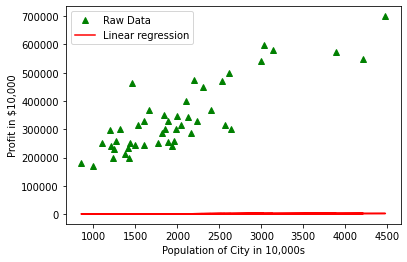

In [ ]:
def main():
    n = 1500
    alpha = 0.01
    X, y = readData("/content/gdrive/MyDrive/Classroom/Học máy 1 Phần cơ sở", "ex1data2.txt")
    X_scl, y_scl = scaleData(X, y)
    print('X scl: ', X_scl[1,:])
    print('y scl: ', y_scl[1])
    w = np.zeros((X_scl.shape[1], 1))
    w, J_history = gradientDescent(X_scl, y_scl, w, alpha, n)
    print("Optimal weights are: ", w)
    print("Loss function: ", J_history[-1])
    visualizeDataAndModel(X, y, w)

if __name__ == '__main__':
    main()

# **Trường hợp 3: DỮ LIỆU ĐƯỢC CHUẨN HÓA THEO CÔNG THỨC MIN-MAX NORMALIZATION**

In [ ]:
# Hàm thiết lập tính năng scale của vector
def featureVectorScaling(data):
  
    # Lấy ra dữ liệu min và max
    snn = data.min()
    sln = data.max()
    data_scl = (data - snn)/(sln - snn)
    print(data_scl[1])
    return data_scl

In [ ]:
# Hàm scale dữ liệu
def scaleData(X, y):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    y_scl = featureVectorScaling(y)
    print('X_scl shape: ', X_scl.shape)
    print(X_scl[1,:])
    print('y scl shape: ', y_scl.shape)
    print(y_scl[1,:])
    return X_scl, y_scl

In [ ]:
# Hàm mất mát
def computeLoss(X, y, w):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

In [ ]:
# Hàm Gradient Descent 
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    print('w_optimal shape: ', w_optimal.shape)
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
# Mô tả bằng dữ liệu plot
def visualizeDataAndModel(X, y, w_optimal):
    fig = plt.figure()
    plt.plot(X[:,1], y, 'g^')
    plt.plot(X[:, 1], np.dot(X, w_optimal), 'r-')
    plt.legend(['Raw Data', 'Linear regression'])
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

Original data shape (47, 3)
X shape:  (47, 2)
y shape:  (47,)
Number of training examples m =  47
Modified X shape:  (47, 3)
Modified y shape:  (47, 1)
0.20628792057363485
0.5
[0.30188679]
X_scl shape:  (47, 3)
[1.         0.20628792 0.5       ]
y scl shape:  (47, 1)
[0.30188679]
X scl:  [1.         0.20628792 0.5       ]
y scl:  [0.30188679]
w_optimal shape:  (3, 1)
Optimal weights are:  [[0.09732989]
 [0.43558141]
 [0.17010536]]
Loss function:  0.011769254424453177


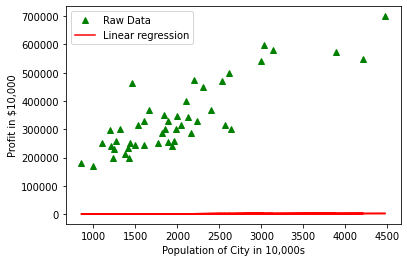

In [ ]:
def main():
    n = 1500
    alpha = 0.01
    X, y = readData("/content/gdrive/MyDrive/Classroom/Học máy 1 Phần cơ sở", "ex1data2.txt")
    X_scl, y_scl = scaleData(X, y)
    print('X scl: ', X_scl[1,:])
    print('y scl: ', y_scl[1])
    w = np.zeros((X_scl.shape[1], 1))
    w, J_history = gradientDescent(X_scl, y_scl, w, alpha, n)
    print("Optimal weights are: ", w)
    print("Loss function: ", J_history[-1])
    visualizeDataAndModel(X, y, w)
    
if __name__ == '__main__':
    main()

# **So sánh kết quả của w_optimal trong các trường hợp:**

> Dữ liệu chưa được chuẩn hóa thì kết quả Optimal weights sẽ bị nan.

> Dữ liệu đã được chuẩn hóa bằng cả 2 công thức Mean normalization và Min-Max normalization thì kết quả Optimal weights đều là một ma trận (3,1) nhưng các phần tử thì khác nhau.



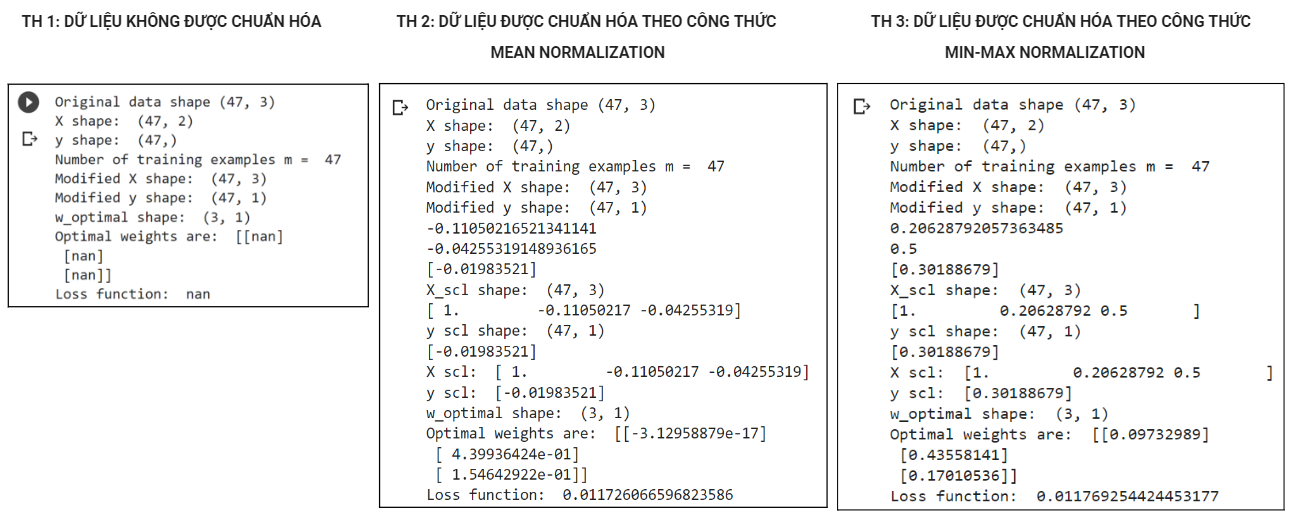